## Dursun Dashdamirov

### Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import missingno

In [58]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import estimator_html_repr
from IPython.core.display import HTML
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

## 1. and 2. questions combined:

## Starting with Titanic dataset, loading data: 

In [47]:
titanic = sns.load_dataset('titanic')
tdata = titanic.copy()

In [48]:
tdata.head(7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


In [49]:
tdata.shape

(891, 15)

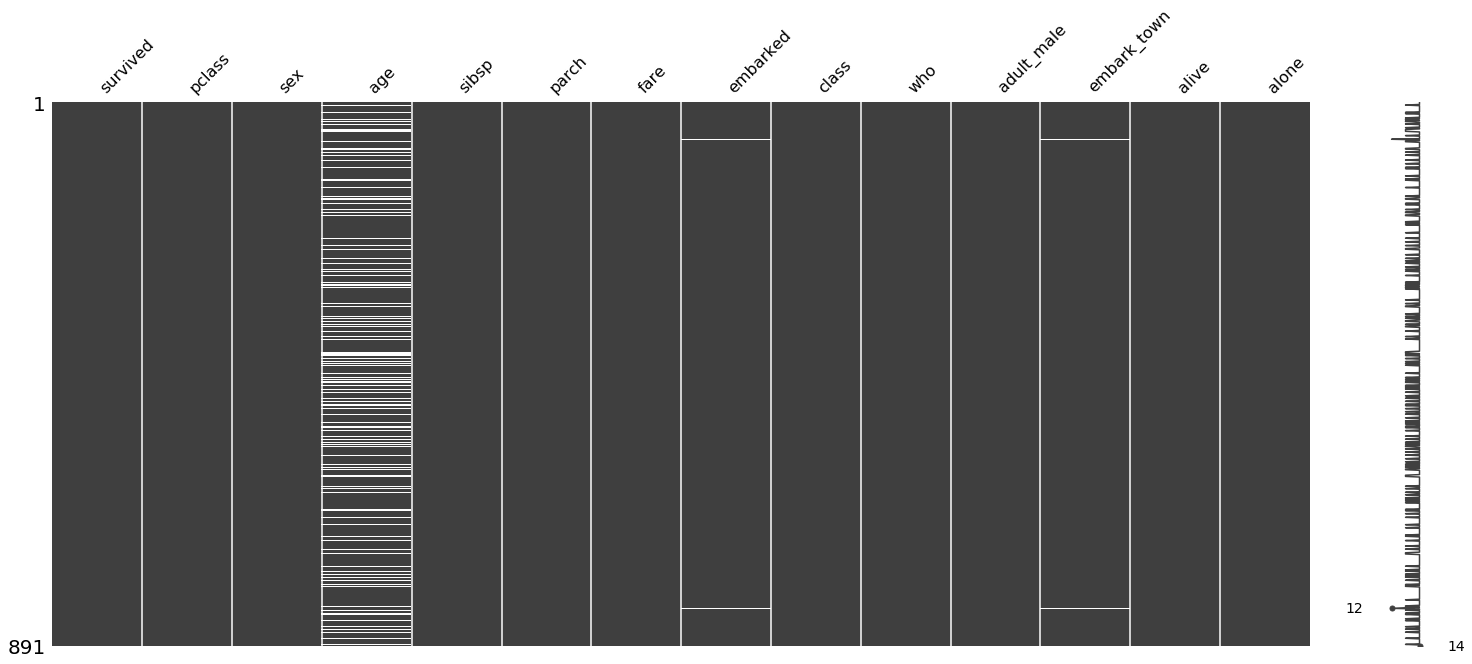

In [55]:
missingno.matrix(tdata)

In [50]:
tdata.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Handling missing values:

Decided to drop 'deck' column since replacing it will not be efficient:

In [53]:
tdata.drop('deck',axis=1, inplace=True)

In [57]:
tdata.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True


### Let's do imputation(age and embark_town columns) and replace all 'null' values with best possible options

In [94]:
#Using KNN imputer
imputer = KNNImputer(n_neighbors=4,copy=True)
tdata['age'] = imputer.fit_transform(tdata['age'].values.reshape(-1, 1))

Replacing categorical values with SimpleImputer(we could also ignore them by dropping since 'NULL' the values are too low):

In [104]:
c_imputer = SimpleImputer(strategy='most_frequent')
tdata.embarked = c_imputer.fit_transform(tdata['embarked'].values.reshape(-1,1))[:,0]
tdata.embark_town = c_imputer.fit_transform(tdata['embark_town'].values.reshape(-1,1))[:,0]

In [106]:
tdata.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## Quick visualization for better understanding of data

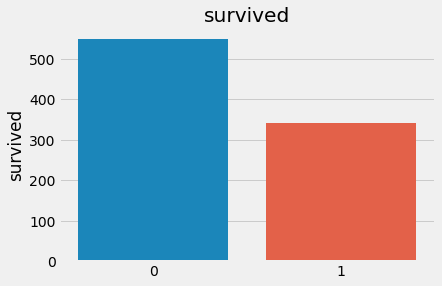

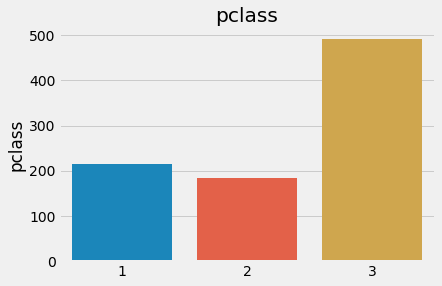

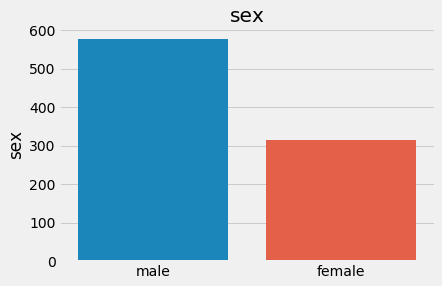

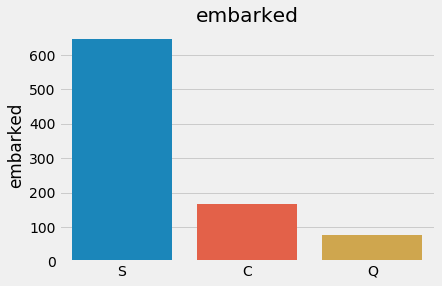

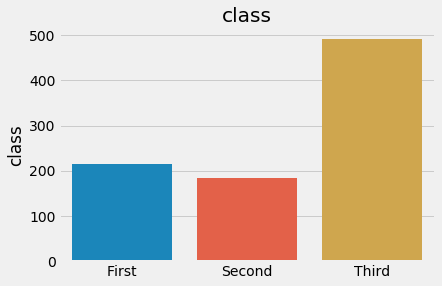

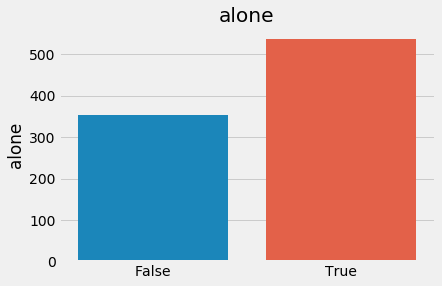

In [247]:
categorical = ['survived','pclass', 'sex', 'embarked', 'class', 'alone']
for i in tdata.columns:
    if i in categorical:
        
        sns.barplot(tdata[i].value_counts().index,tdata[i].value_counts()).set_title(i)
        plt.show()

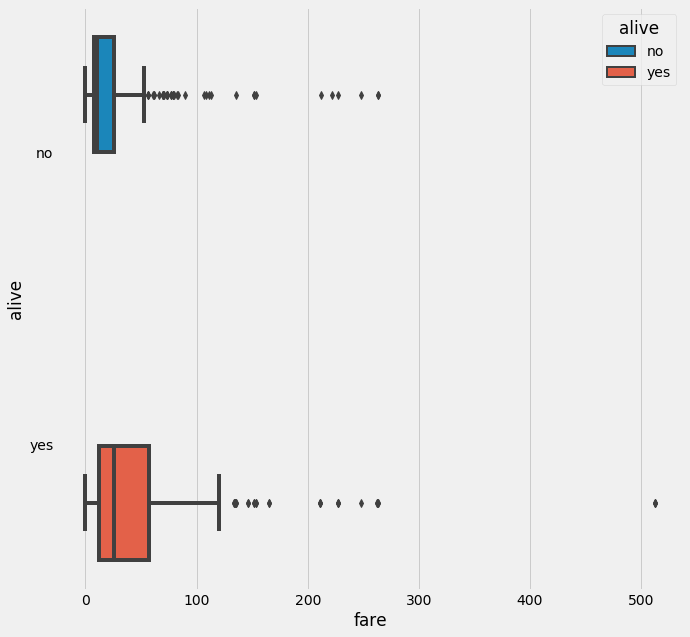

In [248]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(x='fare', y='alive', data=tdata,hue = "alive")

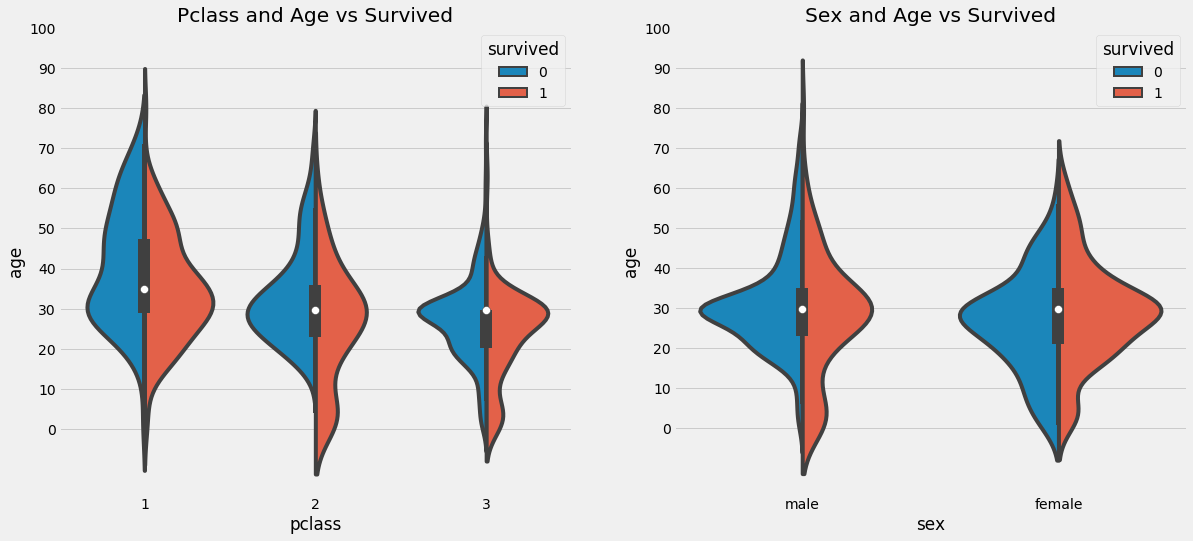

In [255]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("pclass","age", hue="survived", data=tdata,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("sex","age", hue="survived", data=tdata,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

## Classification

In [238]:

test_errors = []

for k in range (1,20):
    numeric_transformer=Pipeline(steps=[ 
        ('scaler', StandardScaler())
    ])

    categorical_transformer=Pipeline(steps=[ 
        ('one_hot_encoding', OneHotEncoder())
    ])

    column_transformer=ColumnTransformer(transformers=[
        ('numeric', numeric_transformer, ['age', 'fare']),
        ('categorical', categorical_transformer, ['sex','alone', 'class', 'pclass'])
    ])

    model_pipeline=Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regressor', KNeighborsClassifier(n_neighbors=k))
    ])
    
    X = tdata[['sex','alone', 'class', 'pclass','age','fare']].copy()
    y = tdata['survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model_pipeline.fit(X_train, y_train)
    result =model_pipeline.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test, result)
    test_errors.append(test_error)

errorpercentage = [element * 100 for element in test_errors]



# 2.c

Text(0.5, 0, 'K value')

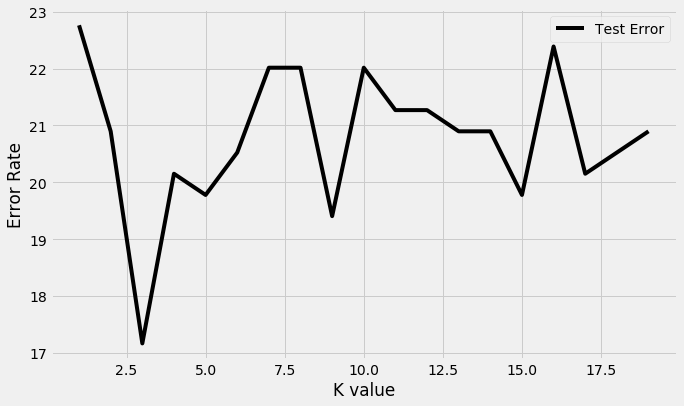

In [249]:
plt.figure(figsize=(10,6))
plt.plot (range(1,20), errorpercentage, label = 'Test Error', color = 'black')
plt.legend()
plt.ylabel("Error Rate")
plt.xlabel("K value")

### 2. a&b

### Best k value is 3 so,

In [240]:
numeric_transformer=Pipeline(steps=[ 
    ('scaler', StandardScaler())
])

categorical_transformer=Pipeline(steps=[ 
    ('one_hot_encoding', OneHotEncoder())
])

column_transformer=ColumnTransformer(transformers=[
        ('numeric', numeric_transformer, ['age', 'fare']),
        ('categorical', categorical_transformer, ['sex','alone', 'class', 'pclass'])
    ])

model_pipeline=Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regressor', KNeighborsClassifier(n_neighbors=3))
    ])
    
    

In [241]:
model_pipeline.fit(X_train, y_train)
result =model_pipeline.predict(X_test)

In [242]:
print(classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       157
           1       0.83      0.74      0.78       111

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



In [243]:
acc =(round(accuracy_score(y_test, result),3))
print('Accuracy : %0.4f ' % acc)

Accuracy : 0.8280 


#### Although the accuracy is not bad we could improve accuracy of model with better feature selection methods or using other Classifiers

# 3.

## Loading Diamonds dataset

In [3]:
data =sns.load_dataset('diamonds')

### First glance to data:

In [4]:
data.head(7)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Having the min value of x,y,z does not make sense because they are dimensions of diamond

## Check for missing values

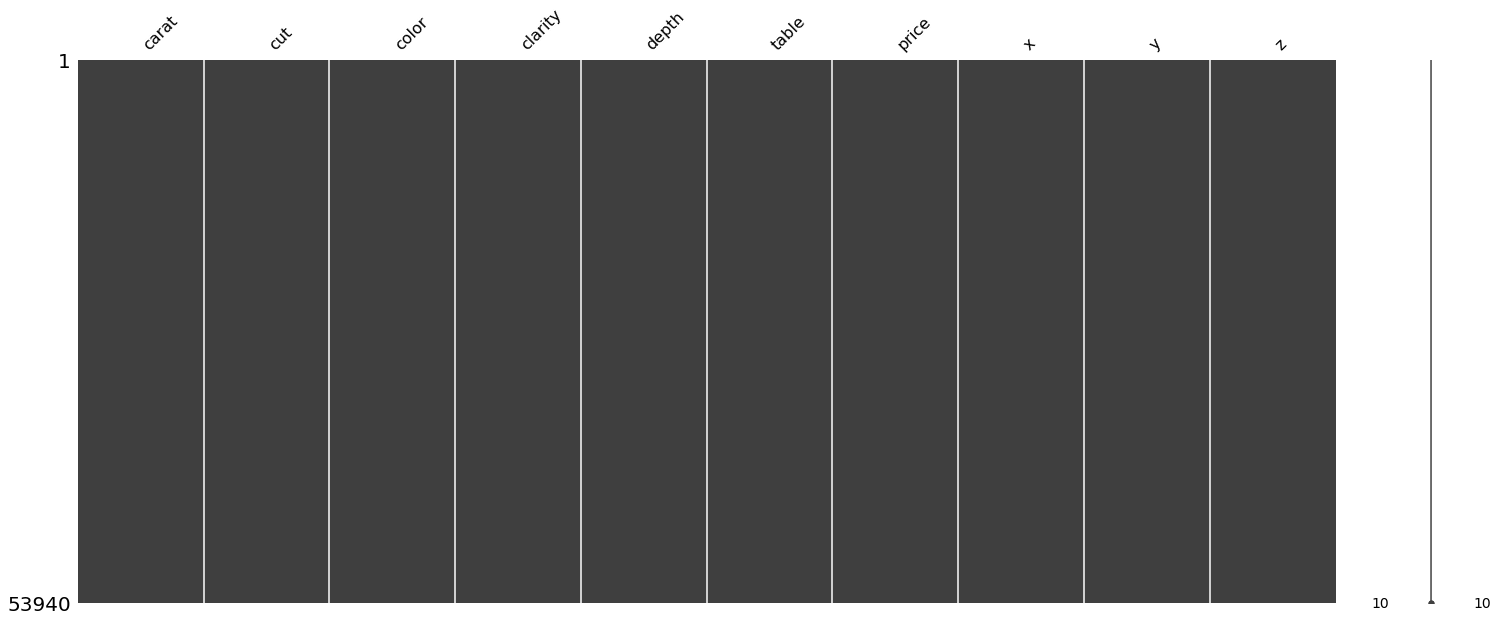

In [7]:
missingno.matrix(data)

### Just for being sure:

In [8]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### Good we do not have any missing values

## Data Cleaning

### Dropping columnns that contain zero for x,y,z columns

In [9]:
zeros = data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]
print(len(zeros))
zeros


20


,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


### We could replace them with mean but I prefer dropping them since they are less compared to data I will drop them

In [10]:
data = data[(data[['x','y','z']] != 0).all(axis=1)]


## Visualizations for better understanding

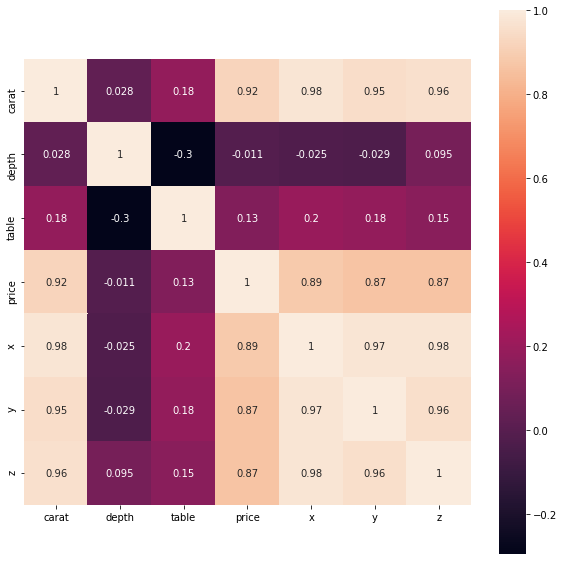

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
corr = data.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

#### Conclusion: There is strong positive correlation between carat, dimensions of diamond and its price.

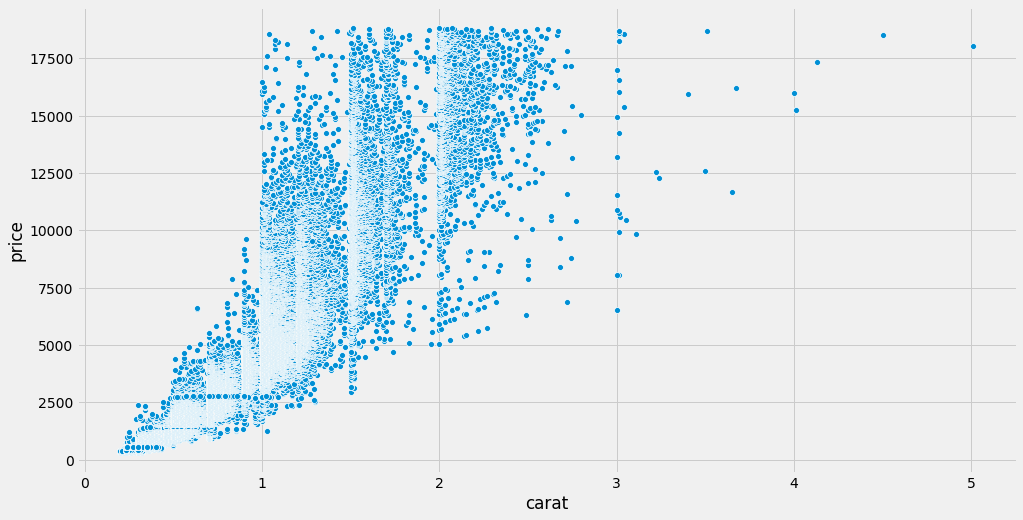

In [250]:
fig, ax = plt.subplots(figsize=(15,8)) 
sns.scatterplot(x='carat', y='price', data=data, marker='o' )

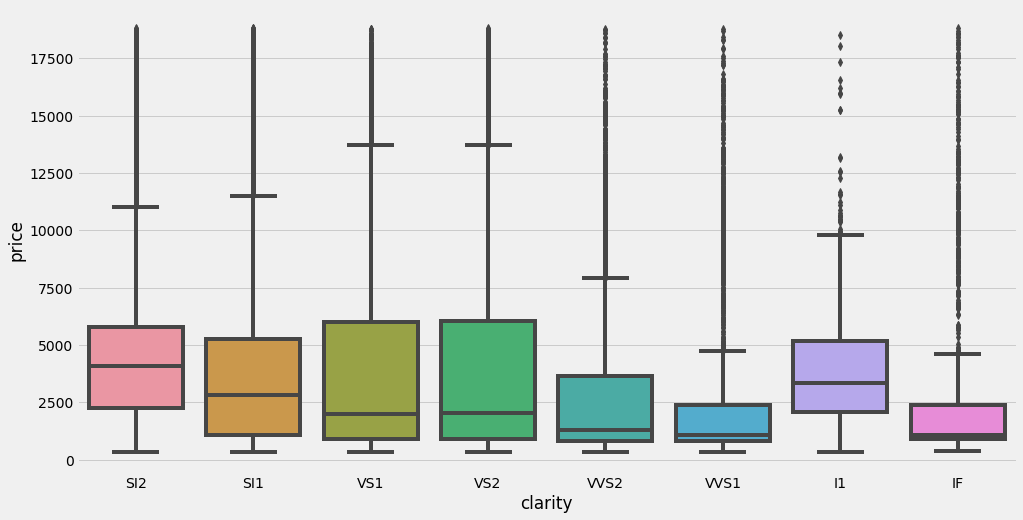

In [251]:
fig, ax = plt.subplots(figsize=(15,8)) 
sns.boxplot(x='clarity', y='price', data=data )


['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1']
[13063, 12254, 9184, 8170, 5066, 3654, 1790, 738]


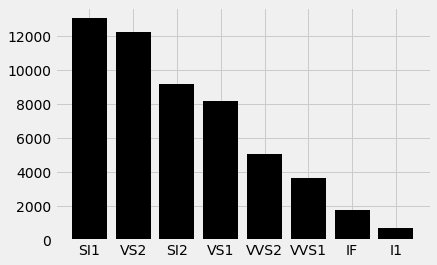

In [252]:
clarityindexes = data["clarity"].value_counts().index.tolist()
claritycount = data["clarity"].value_counts().values.tolist()

print(clarityindexes)
print(claritycount)
plt.bar(clarityindexes, claritycount, color='black')
plt.show()


C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


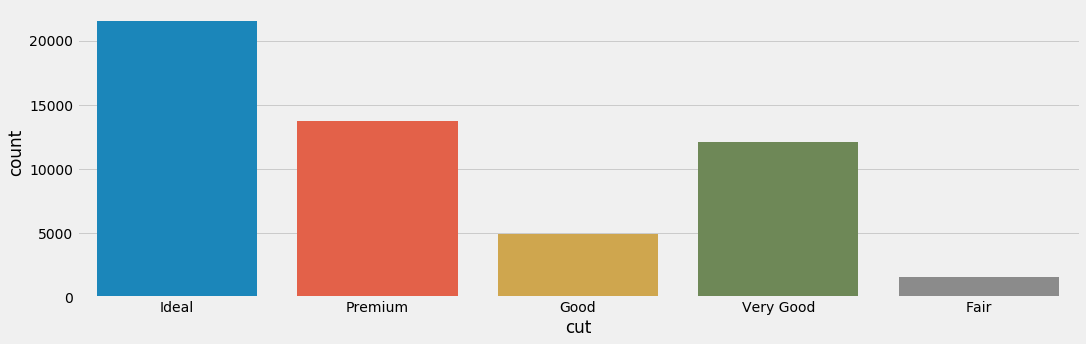

In [253]:
sns.factorplot(x='cut', data=data , kind='count',aspect=3)


## Feature Engineering

 Istead of having 3 seperate dimensions, we can calculate the volume of diamond. Multiplying them will not give us their real volumes but it will close with real values.

In [16]:
data['volume'] = data['x']*data['y']*data['z']

In [17]:
data.sort_values('volume',ascending = False).head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,3840.598060
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,838.502400
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,838.502400
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,790.133208
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,698.455296
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43,633.355000
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,631.894380
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31,627.841214
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24,621.496512
26534,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13,592.934058


It seems we have an outlier in data, 3840 mm3 does not seem quite realistic, so we are dropping it:

In [18]:
i = data[(data.volume > 3000)].index
data = data.drop(i)

In [19]:
data.sort_values('volume',ascending = False).head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,838.502400
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,838.502400
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,790.133208


We are good to go

(0, 18000)

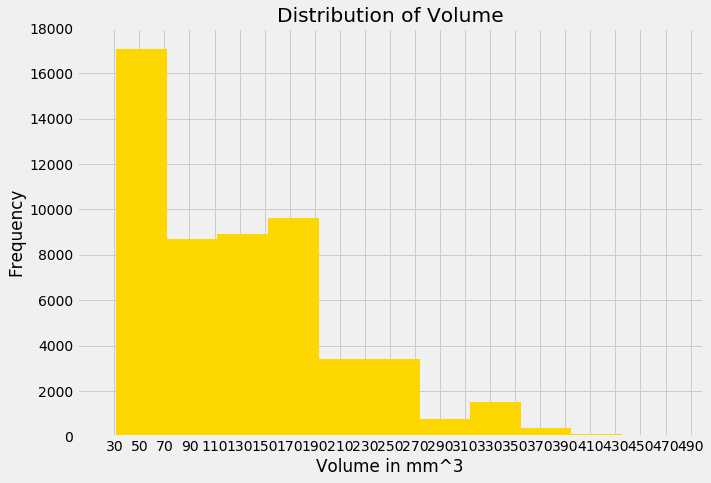

In [254]:
plt.figure(figsize=(10,7))
plt.hist( x=data['volume'] , bins=20 ,color='gold')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Volume')

plt.xticks(np.arange(30,500,20))
plt.xlim(0,500)
plt.ylim(0,18000)

## Creating Pipeline

In [33]:
numeric_transformer=Pipeline(steps=[ 
    ('scaler', StandardScaler())
])

categorical_transformer=Pipeline(steps=[ 
    ('one_hot_encoding', OneHotEncoder())
])

column_transformer=ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, ['carat', 'volume']),
    ('categorical', categorical_transformer, ['clarity', 'cut', 'color'])
])

model_pipeline=Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regressor', KNeighborsRegressor(n_neighbors=12))
])

In [34]:
HTML(estimator_html_repr(model_pipeline))

In [35]:
X = data[['carat', 'volume', 'clarity', 'cut','color']]
y = data[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [36]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'volume']),
                                                 ('categorical',
                                                  Pipeline(steps=[('one_hot_encoding',
                                                                   OneHotEncoder())]),
                                                  ['clarity', 'cut',
                                                   'color'])])),
                ('regressor', KNeighborsRegressor(n_neighbors=12))])

In [37]:
res =model_pipeline.predict(X_test)

In [40]:
mse = mean_squared_error(y_test, res)
mae = mean_absolute_error(y_test, res)
rmse = mean_squared_error(y_test, res)**0.5
r2 = r2_score(y_test, res)


print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


MSE    : 475000.23 
MAE    : 340.17 
RMSE   : 689.20 
R2     : 0.97 


### With calculated metrics, we can say that our KNeighborsRegressor is giving satisfactory results.